In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import rcParams
import numpy as np
import math
from PIL import Image
from os import path
import matplotlib.pyplot as plt
import random

sns.set(style="whitegrid", palette="colorblind", color_codes=True, font_scale=1.4, font='NanumGothic' )
rcParams['font.family'] = 'NanumGothic'

%matplotlib inline

### 크롤링 데이터셋 로드 
#### Github Popular Repositories
* Most forks : http://github-rank.com/fork?language=Java
* Most starred : http://github-rank.com/star?language=Java


In [2]:
## data load

name_ds = pd.read_pickle('./resource/name_ds.pkl')
words_ds = pd.read_pickle('./resource/words_ds.pkl')
repo_meta_ds = pd.read_pickle('./resource/repo_ds.pkl')
pos_tagged_ds = pd.read_pickle('./resource/pos_tagged_ds.pkl')

In [3]:
## word cloud by word-frequency 
from os import path
from wordcloud import WordCloud

## draw word cloud by word-corpus 

def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(230, 60%%, %d%%)" % random.randint(0, 20)


def drawWordCloud(corpus, figsize=(10,10)):
    mask = np.array(Image.open('./resource/shape-round-square-long.png'))
    
    wordcloud = WordCloud(width=1000, height=400, margin=2, background_color='white'
                          , color_func=grey_color_func 
                          , mask=mask)
    if type(corpus)==str:
        wordcloud = wordcloud.generate(corpus)
    else :
        wordcloud = wordcloud.generate_from_frequencies(corpus)

    plt.figure(figsize=figsize)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

### 기본 스탯 
* 분석 소스파일 수 
* 추출한 변수/함수/클래스 네임 수 
* 네임에 포함된 단어수 


In [4]:
unique_name_ds = name_ds.groupby('name').count()[['kind']].reset_index()

많이 사용하는 네이밍 Word Cloud

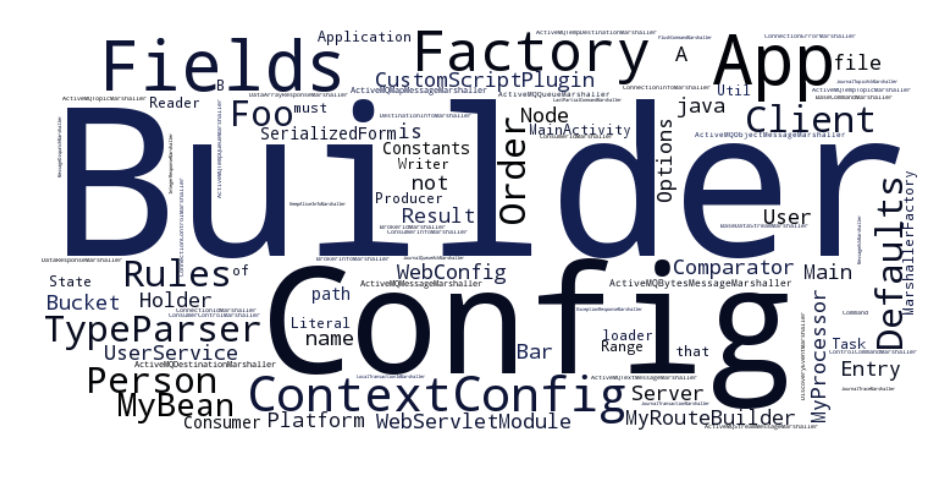

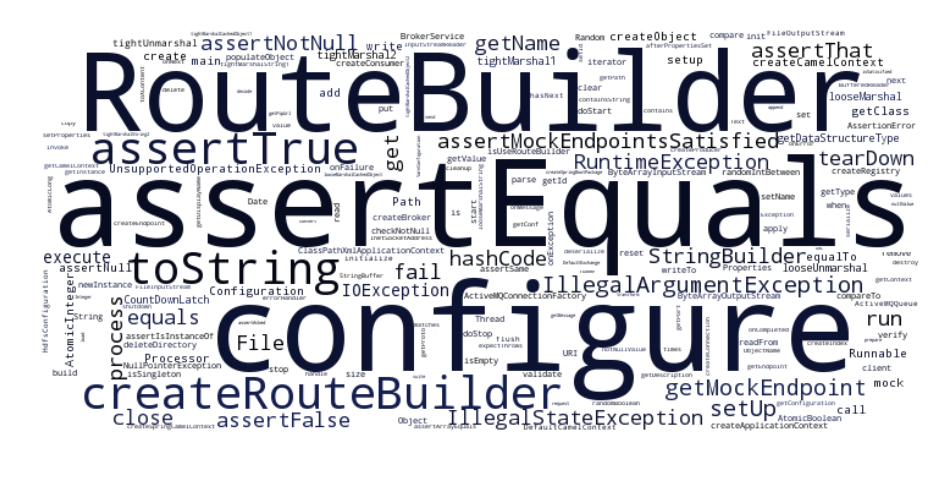

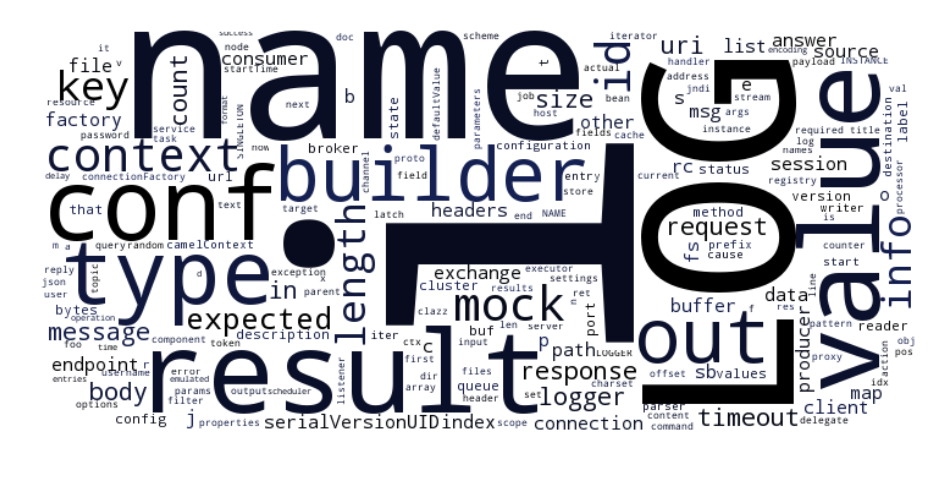

In [5]:
unique_name_ds = name_ds[name_ds.kind=='class'].groupby('name').count()[['kind']].reset_index()
drawWordCloud(unique_name_ds.values, figsize=(18,8))

unique_name_ds = name_ds[name_ds.kind=='function'].groupby('name').count()[['kind']].reset_index()
drawWordCloud(unique_name_ds.values, figsize=(18,8))

unique_name_ds = name_ds[name_ds.kind=='variable'].groupby('name').count()[['kind']].reset_index()
drawWordCloud(unique_name_ds.values, figsize=(18,8))


### 분석할 소스 리스트

In [6]:
topic_list = name_ds.groupby('topic').count()['name'].reset_index().values.tolist()
topic_list = [(word, math.log(score,100))for [word, score]  in topic_list]

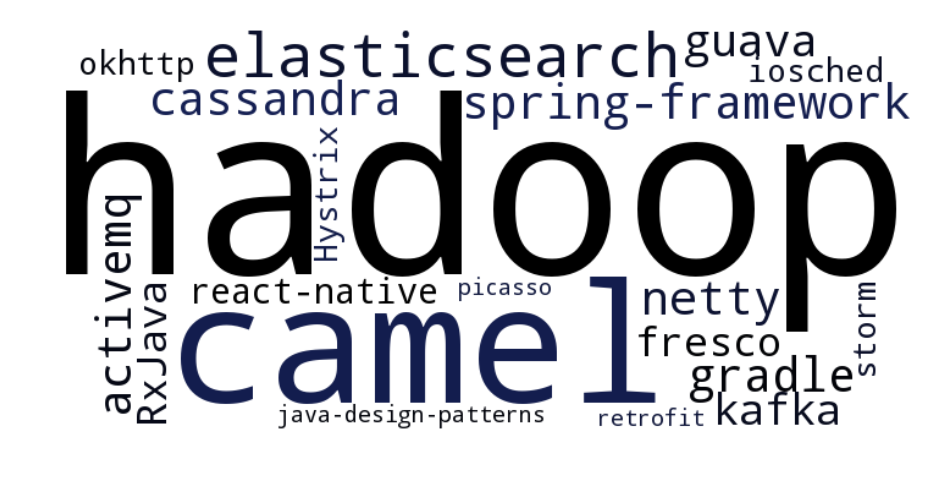

In [7]:
drawWordCloud(topic_list, figsize=(18,8))

### 탐색할 항목 
* Repository별 Java 파일수 
* 각 Repository별 변수, 함수, 클래스 통계
* intent 분포
 * 각 Repository별 
 * Name별 타입별 
* 변수/함수/클래스 word-cloud 
* 변수 길이 분포 


###  Repo별 Java 파일수

In [8]:
print( u"java file 수", repo_meta_ds.sort('file_cnt').sum()['file_cnt'] )

java file 수 55557


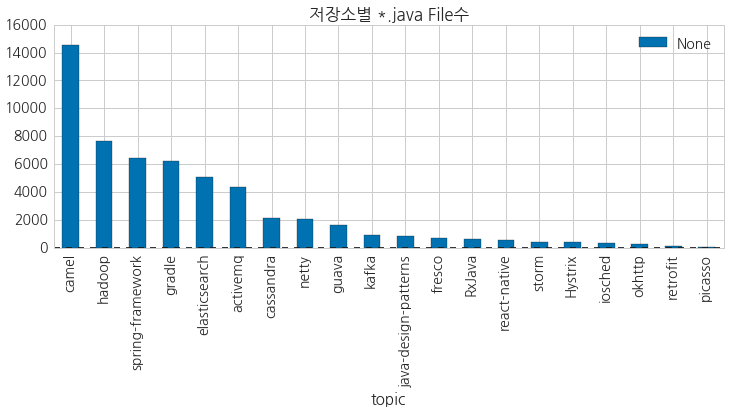

In [9]:
repo_meta_ds.sort('file_cnt', ascending=False).plot(kind='bar', x='topic', y='file_cnt' , figsize=(12,4)
                        , title=u'저장소별 *.java File수')
plt.show()

### 각 Repository별 변수, 함수, 클래스 통계

In [10]:
repo_kind_stat = name_ds.groupby(['topic','kind']).agg({'name': lambda x: len(x.unique())})
repo_kind_stat = repo_kind_stat.reset_index().\
            pivot_table(index='topic', columns='kind', values='name', aggfunc=sum, margins=True).reset_index()
# repo_meta_ds = repo_meta_ds.merge(repo_kind_stat, on='topic')
repo_kind_stat.set_index('topic',inplace=True)
repo_kind_stat['variable(%)'] = repo_kind_stat.variable / repo_kind_stat['All']
repo_kind_stat['function(%)'] = repo_kind_stat.function / repo_kind_stat['All']
repo_kind_stat['class(%)'] = repo_kind_stat['class'] / repo_kind_stat['All']

* 스탯 코멘트
<pre>
변수 37%, 함수 50% 클래수 13%의 개수로 분포가 이루어져있다. 
(유니크한)변수의 수가 가장 많을줄 알았는데 예상외보 함수의 50%의 비중으로 가장 많았다. 
Repository별로 비슷한 비율과 변수, 함수, 클래스의 비율을 가지고 있었다. 

클래스 이름을 좀더 신중이 지어라!
</pre>

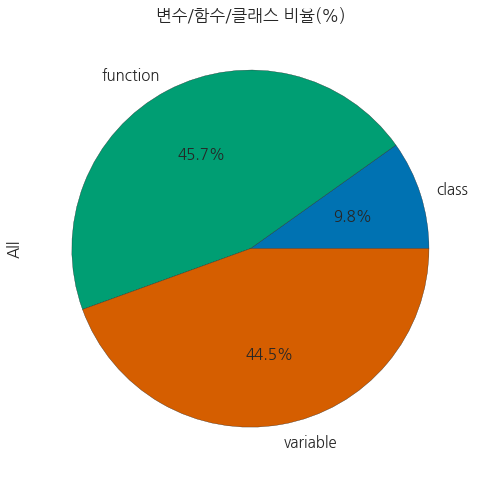

In [11]:
repo_kind_stat['class function variable'.split()].loc['All']\
        .plot(kind='pie', figsize=(8,8), autopct='%.1f%%', fontsize=15, title=u'변수/함수/클래스 비율(%)')
plt.show()

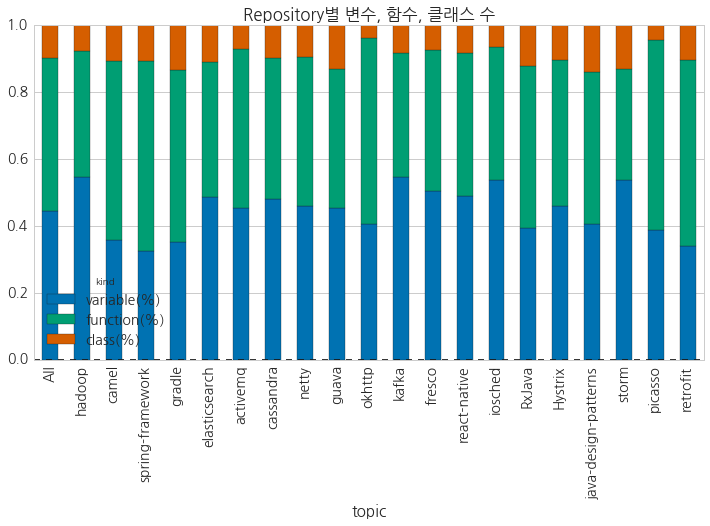

In [12]:
repo_kind_stat.sort('function',ascending=False)[['variable(%)', 'function(%)', 'class(%)']]\
            .plot(kind='bar', stacked=True, figsize=(12,6),title=u'Repository별 변수, 함수, 클래스 수')
plt.show()

### 네이밍에 사용된 단어수 분포
* 변수, 함수, 클래스 별 단어수 
* 프로젝트별 단어수 


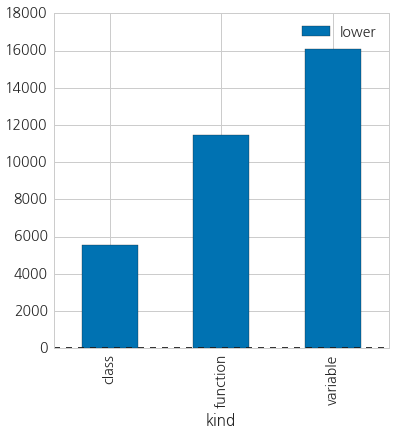

In [13]:
words_ds.groupby(['kind']).agg({'lower':lambda x: len(x.unique())}).plot(kind='bar', figsize=(6,6) )

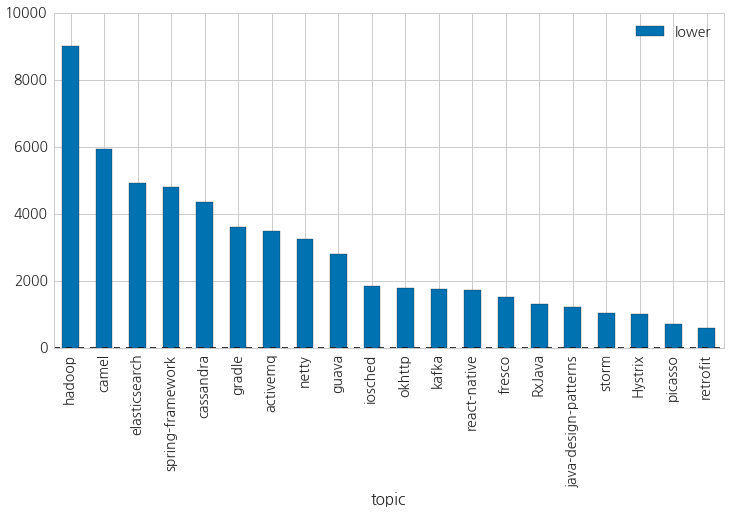

In [14]:
words_ds.groupby(['topic']).agg({'lower':lambda x: len(x.unique())}).sort('lower', ascending=False)\
            .plot(kind='bar', figsize=(12,6) )

### intent 분포 
* 20자 이상 intent는 20으로 함
* 1 tap = 4 chars


In [15]:
name_ds.intent = name_ds.intent.apply(lambda x: min(x,20))

<pre>
인턴트 깊이는 예상되는 대로 클래스>>함수>변수 순으로 결과가 나타 났다. 
그런데 생각보다 함수의 평균 인텐트 깊이가 6.3으로 깊게 나온것이 아는가 생각이 든다. 
</pre>

In [16]:
name_ds.groupby('kind').mean()

,intent
kind,
class,0.948891
function,6.528304
variable,7.557790


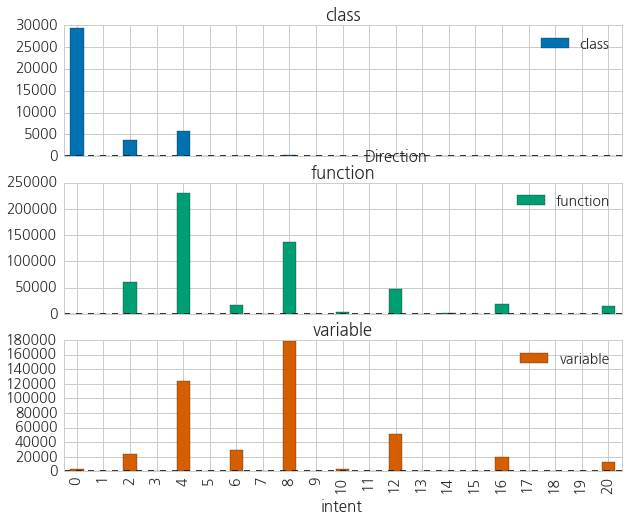

In [17]:
intent_ds = name_ds.pivot_table(index='intent', columns='kind', values='topic', aggfunc=len).fillna(0)
axes = intent_ds.plot(kind='bar', stacked=True, figsize=(10,8), subplots=True)
axes[0].text(12, 0, "Direction", ha="center", va="center", size=15)
plt.show()

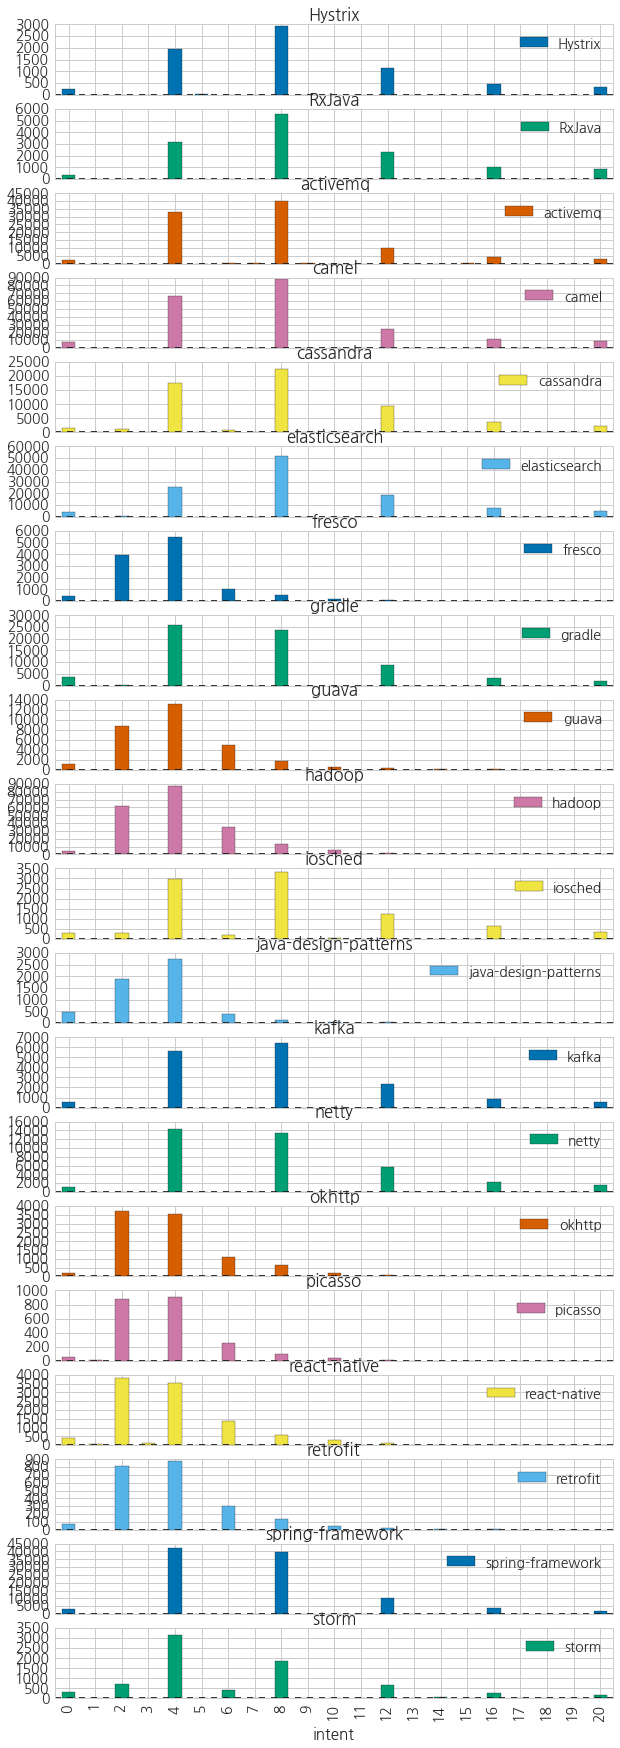

In [18]:
intent_ds = name_ds.pivot_table(index='intent', columns='topic', values='name', aggfunc=len).fillna(0)
intent_ds.plot(kind='bar', stacked=True, figsize=(10,30), subplots=True)
plt.show()

### 네이밍의 글자수 분포

In [19]:
name_ds['char_len'] = name_ds.name.apply(len)
val_unique_ds = name_ds.groupby(['name','char_len','topic','kind']).count()[['intent']].reset_index()

In [20]:
val_unique_ds.describe()

,char_len,intent
count,354749.000000,354749.000000
mean,15.827145,2.873736
std,8.560332,24.061953
min,1.000000,1.000000
25%,10.000000,1.000000
50%,14.000000,1.000000
75%,20.000000,2.000000
max,146.000000,5263.000000


<pre>
일명 잘나가는 오픈소스들은 평균적으로 변수는 13자, 함수는 18자, 클래스는 20자로 생각보다 변수명이 길었다. 
( 나는 소스가 간결하게 보일려고 짧게 만들려고 노력을 했는데, 다음 부터는 네이밍에 적절한 글자수를 고려해 봐야 겠다.) 

그리고 클래스>함수>>변수 순으로 네이밍의 글자수가 달랐는데, 
이는 기능 많이 넣을수 있고, 스코프를 넓게 가져 갈수 있는 네이밍 타입이 
적절히 반영된 결과가 아닌가 싶다. 
</pre>

In [21]:
import math

def drawChatHist(ds, col, xlim=(0,50), xtick_step=4, figsize=(12,8)):
    pivot_ds = ds.pivot_table(index='char_len', columns=col, values='name', aggfunc=len).fillna(0)
    col_size = len(pivot_ds.columns)
    
    plot_layout = (math.ceil(col_size/3.0), 3) if col_size > 4 else (col_size, 1)
    
    
    ax = pivot_ds.plot(kind='bar', stacked=True, figsize=figsize, subplots=True, layout=plot_layout)
    ax = np.reshape(ax, (plot_layout[0]*plot_layout[1],))

    tick_idx = np.arange(xlim[0], xlim[1], xtick_step)
    # plt.xticks( tick_idx, tick_idx )
    
    plt.setp(ax, xticks=tick_idx, xticklabels=tick_idx, xlim=xlim)

    
    for (idx, char_len) in enumerate(val_unique_ds.groupby(col).mean()['char_len']):
        ax[idx].text(.8, .5, u'Mean = %.0f' % char_len
                     , ha='center', va='center', transform=ax[idx].transAxes , fontsize=15, color='r' )
    plt.xlim(xlim)
    plt.show()
    


In [22]:
ds = val_unique_ds.pivot_table(index='char_len', columns='kind', values='name', aggfunc=len).fillna(0)

In [23]:
val_unique_ds.head()

,name,char_len,topic,kind,intent
0,A,1,Hystrix,class,1
1,A,1,activemq,class,2
2,A,1,activemq,function,4
3,A,1,camel,class,3
4,A,1,camel,function,1


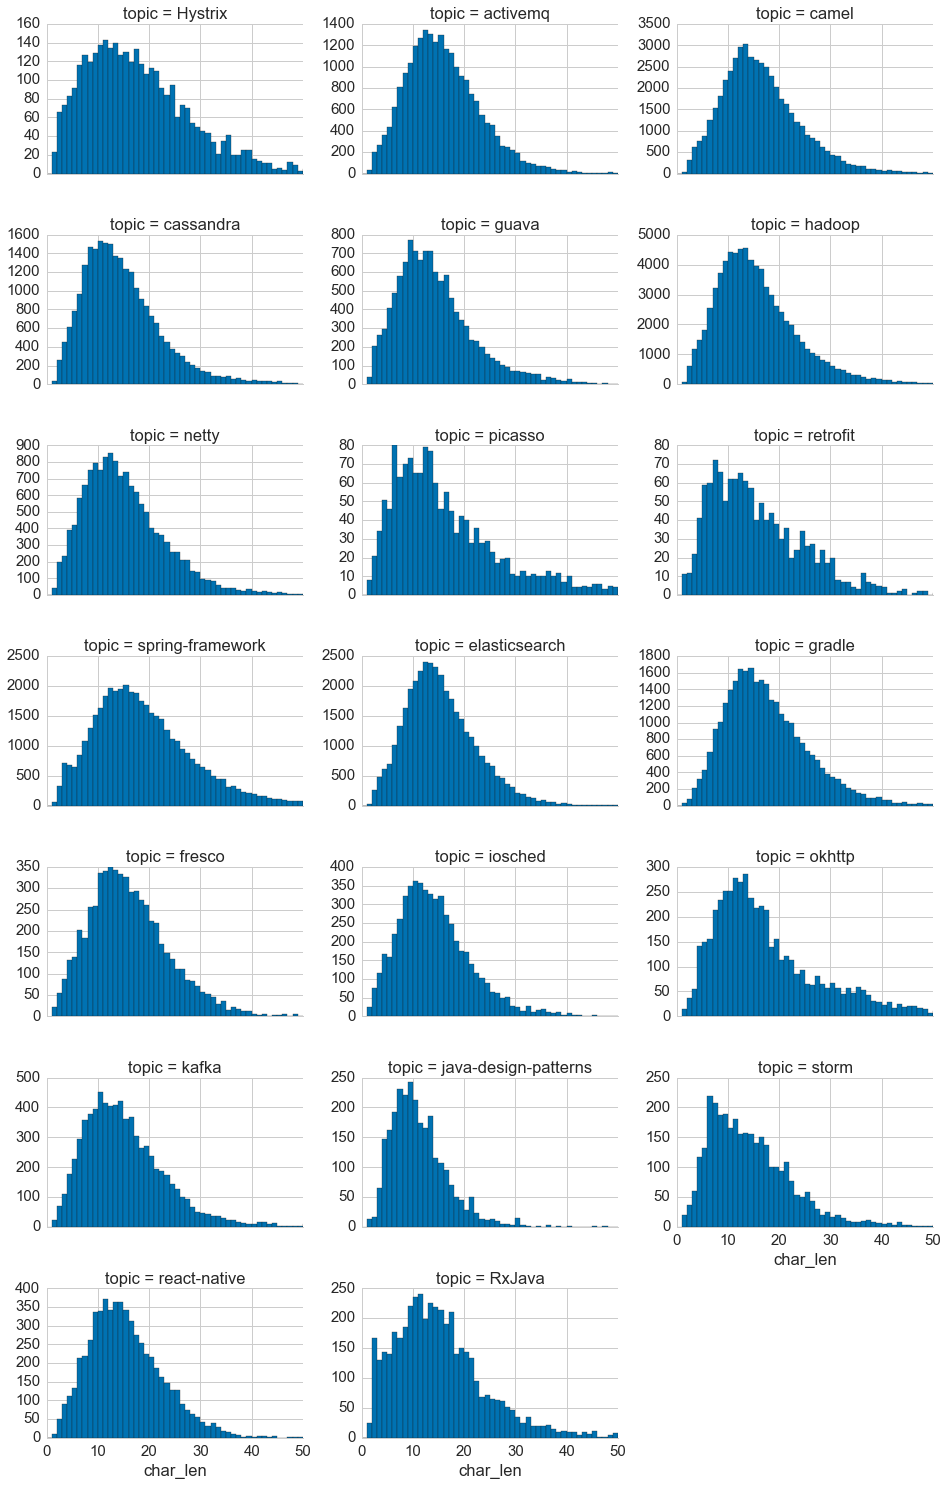

In [24]:
import numpy as np
sns.set(style="whitegrid", palette="colorblind", color_codes=True, font_scale=1.5)
bins = np.arange(0, 60, 1)
g = sns.FacetGrid(val_unique_ds,  col="topic", col_wrap=3, size=3, aspect=1.5, sharey=False, xlim=(0,50))
g = g.map(plt.hist, "char_len", bins=bins, color="b"  )
sns.set(style="whitegrid", palette="colorblind", color_codes=True, font_scale=1.4, font='NanumGothic')


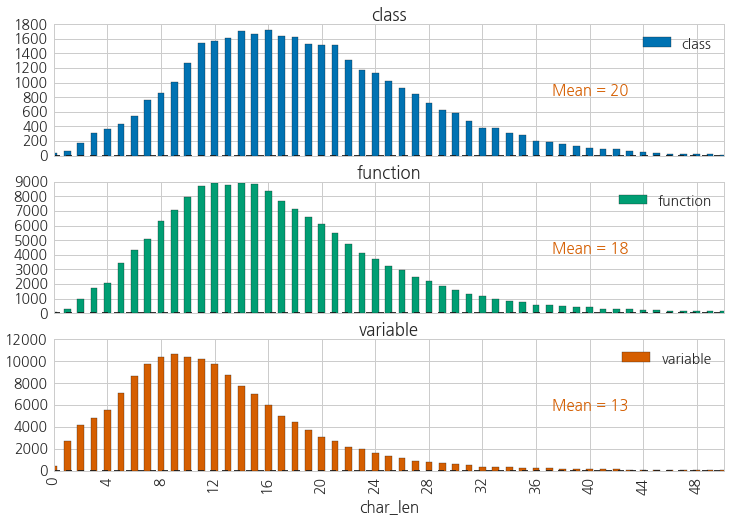

In [25]:
drawChatHist(val_unique_ds, 'kind')

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


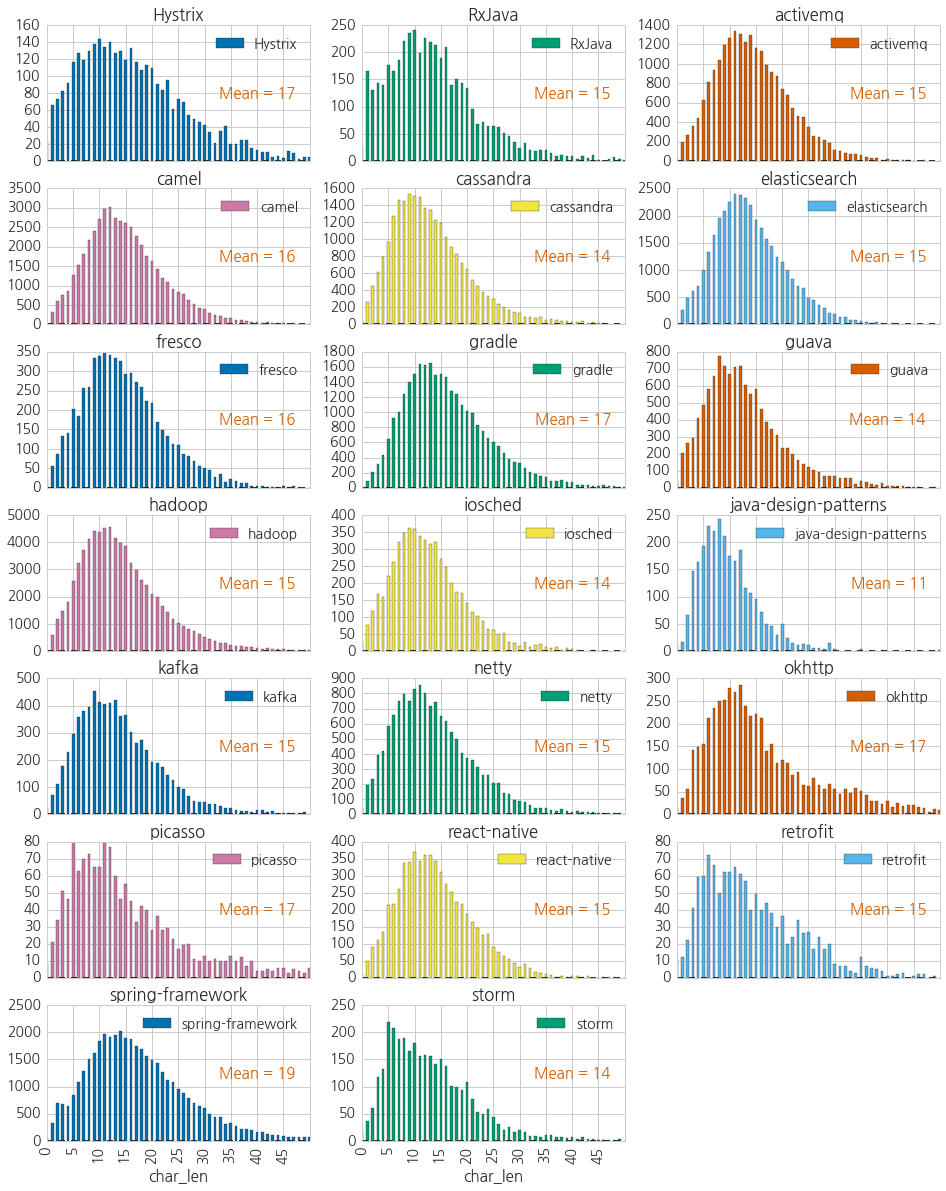

In [26]:
drawChatHist(val_unique_ds, 'topic', figsize=(16,20), xtick_step=5)

### 네이밍의 단어수 
* 네이밍을 할때 몇개의 단어를 조합하는가?

In [27]:
kind_word_count_ds = pos_tagged_ds.pivot_table(index='len', columns='kind', values='tokens',aggfunc=len,fill_value=0)

In [28]:
pos_tagged_ds.head()

,len,tokens,pos,count,kind
0,1,[a],DT,21,class
1,1,[a],DT,13,function
2,1,[a],DT,22,variable
3,1,[a],DT,8,variable
4,2,"[a, record]",DT+NN,1,class


In [29]:
print("mean word count", pos_tagged_ds['len'].mean())
pos_tagged_ds.groupby('kind').agg({'len':np.mean})

mean word count 2.98628313481


,len
kind,
class,3.184601
function,3.370740
variable,2.517823


array([<matplotlib.axes._subplots.AxesSubplot object at 0x13cc8fcf8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x131afcfd0>], dtype=object)

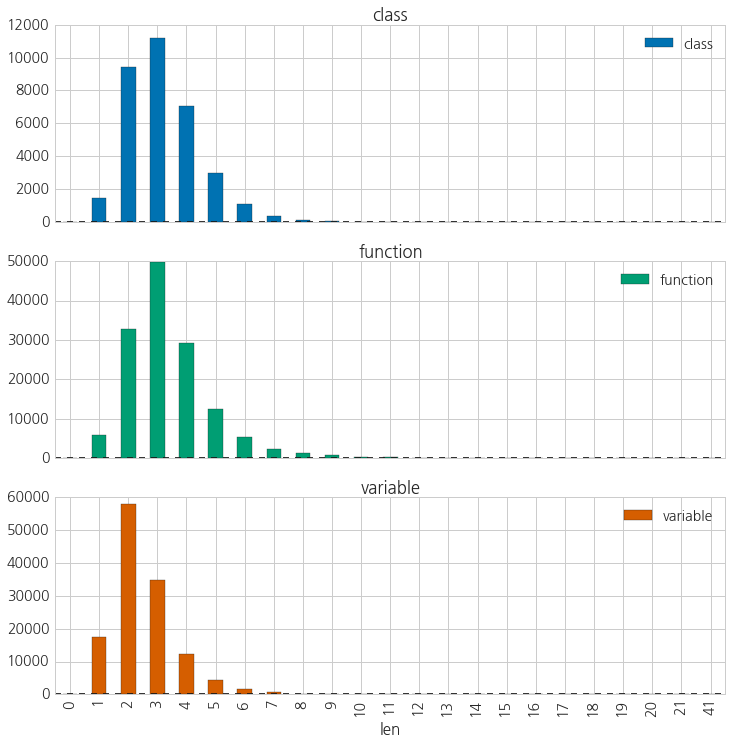

In [30]:
kind_word_count_ds.plot(kind='bar', subplots=True, figsize=(12,12))

### 형태소 분석
* 전체 형태소 출현 비율
* kind별 형태소 조합 
* 단어수별 형태소 조합 



In [31]:
pos_tagged_ds['len'] = pos_tagged_ds['len'].apply(lambda x: min(10,x))
pos_tagged_ds  = pos_tagged_ds[pos_tagged_ds['len']>0]

In [32]:
pos_tagged_ds.head(2)

,len,tokens,pos,count,kind
0,1,[a],DT,21,class
1,1,[a],DT,13,function


In [33]:
pos_nams_str = """CC:접속사
CD:숫자
DT:정관사
EX:EX
FW:외국어
IN:전치사
JJ:형용사
JJR:형용사(비교급)
JJS:형용사(최상급)
LS:LS
MD:modal
NN:명사
NNS:명사(복수)
NNP:명사(고유)
NNPS:명사(고유복수)
PDT:PDT
POS:소유격
PRP:대명사
PRP$:대명사
RB:부사
RBR:부사(비교급)
RBS:부사(최상급)
RP:RP
TO:TO
UH:감탄사
VB:동사
VBD:동사(과거)
VBG:동사(현재진행형)
VBN:동사(과거완료)
VBP:동사(VBP)
VBZ:동사(VBZ)
WDT:WH의문사
WP:WH의문사
WP$:WH의문사
WRB:WH의문사 """

pos2name = {}
for pair in pos_nams_str.split('\n'):
    pair = pair.split(':')
    pos2name[pair[0]] = pair[1]

형태소 출현 비율 

1. pos tag split by '+'
2. count by pos tag 

In [34]:
from collections import defaultdict

pos_unique_cnt_dict = { kind:defaultdict(int) for kind in pos_tagged_ds.kind.unique()}
for (pos,kind) in zip(pos_tagged_ds['pos'],pos_tagged_ds['kind']):
    for tag in pos.split('+'):
        tag = pos2name.get(tag, 'None')
        pos_unique_cnt_dict[kind][tag] += 1


In [35]:
pos_unique_cnt_ds = pd.DataFrame.from_dict(pos_unique_cnt_dict,orient='columns')
pos_unique_cnt_ds.fillna(0, inplace=True)
pos_unique_cnt_ds.sort('function', ascending=False, inplace=True)

In [36]:
top_pos_list = pos_unique_cnt_ds[:15].index.values.tolist()

품사별 단어 분포 

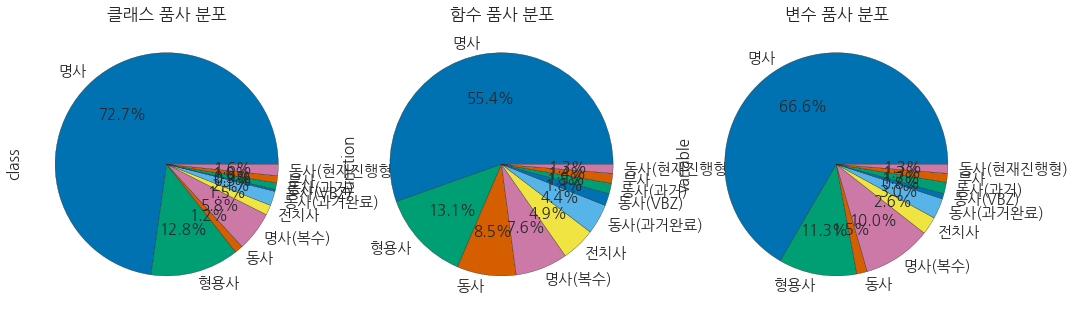

In [37]:
axes = pos_unique_cnt_ds[:10].plot(kind='pie',
                                       subplots=True, figsize=(17,5)
                                       , legend=None
                                       , autopct='%.1f%%'
                                       , fontsize=15 )

axes[0].set_title(u'클래스 품사 분포')
axes[1].set_title(u'함수 품사 분포')
axes[2].set_title(u'변수 품사 분포')

In [38]:
from collections import defaultdict

pos_token_list = []
for (pos, kind, tokens) in zip(pos_tagged_ds['pos'], pos_tagged_ds['kind'], pos_tagged_ds['tokens']):
    for (idx, tag) in enumerate(pos.split('+')):
        tag = pos2name.get(tag, 'None')
        pos_token_list.append([tag, tokens[idx], kind ])
        

In [39]:
pos_token_ds = pd.DataFrame(pos_token_list, columns=['pos', 'word', 'kind'])

In [40]:
pos_token_ds.head(2)

,pos,word,kind
0,정관사,a,class
1,정관사,a,function


In [41]:
def drawPopularPosWord(ds):
    tmp_ds = ds.groupby(['pos','word']).count().sort('kind', ascending=False).reset_index()
    tmp_ds['rank'] = tmp_ds.groupby('pos')['kind'].rank("dense", ascending=False).apply(lambda x: int(x))
    tmp_ds = tmp_ds[tmp_ds['rank']<=10]
    pivot_val_ds = tmp_ds.pivot_table(index='pos', columns='rank', values='kind', aggfunc=max).fillna(0).loc[top_pos_list]
    pivot_label_ds = tmp_ds.pivot_table(index='pos', columns='rank', values='word', aggfunc=max).fillna('-').loc[top_pos_list]
    sns.set(style="whitegrid", palette="colorblind", color_codes=True, font_scale=1.2, font='NanumGothic' )
    plt.figure(figsize=(16,10))
    ax = sns.heatmap(pivot_val_ds, annot=pivot_label_ds.values, fmt="", linewidths=.2)

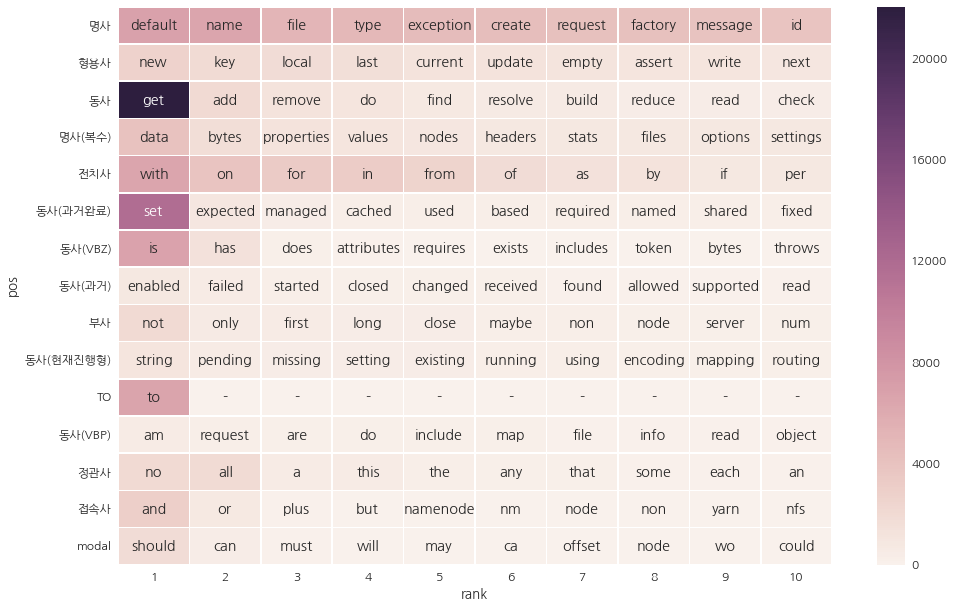

In [42]:
drawPopularPosWord(pos_token_ds)

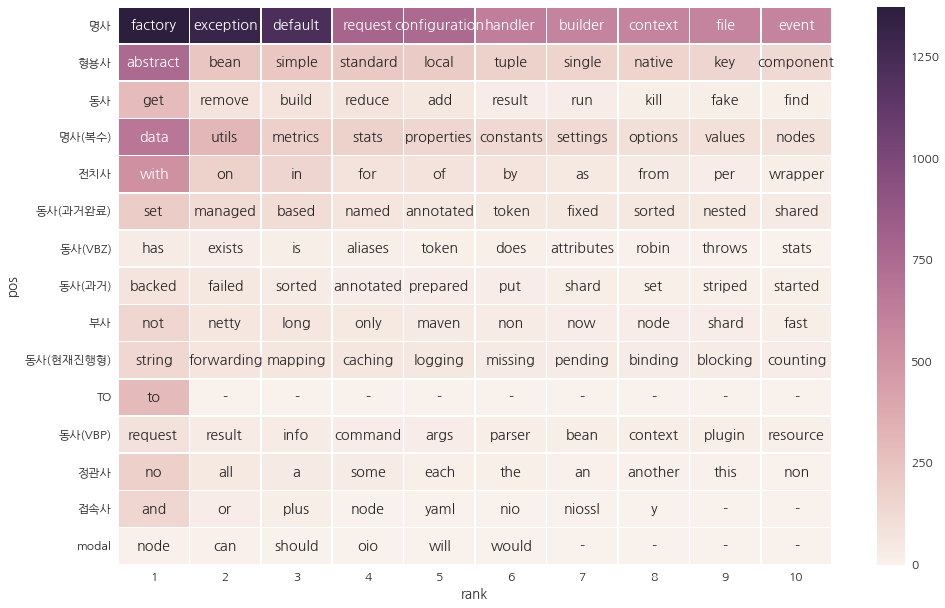

In [43]:
drawPopularPosWord(pos_token_ds[pos_token_ds['kind']=='class'])

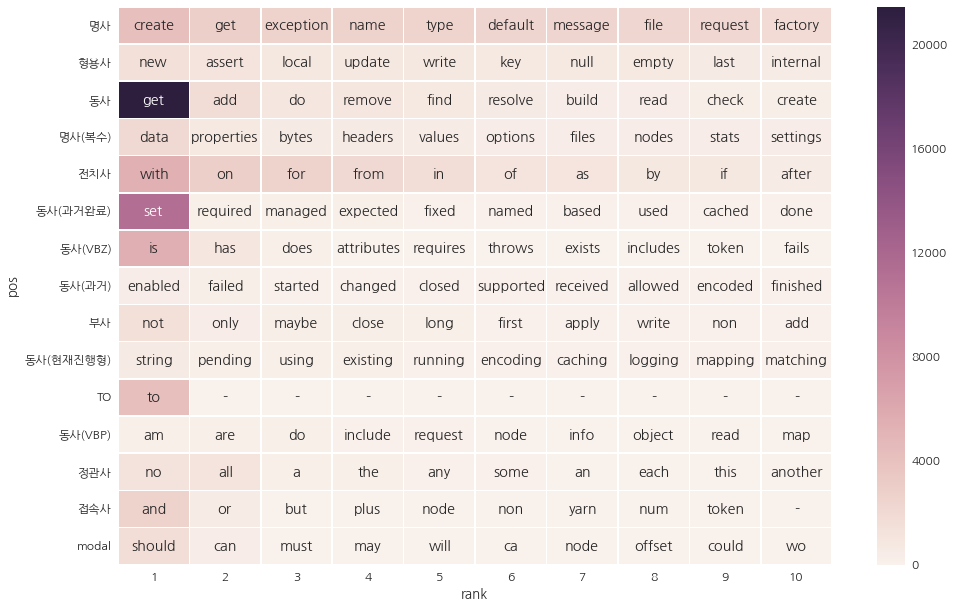

In [44]:
drawPopularPosWord(pos_token_ds[pos_token_ds['kind']=='function'])

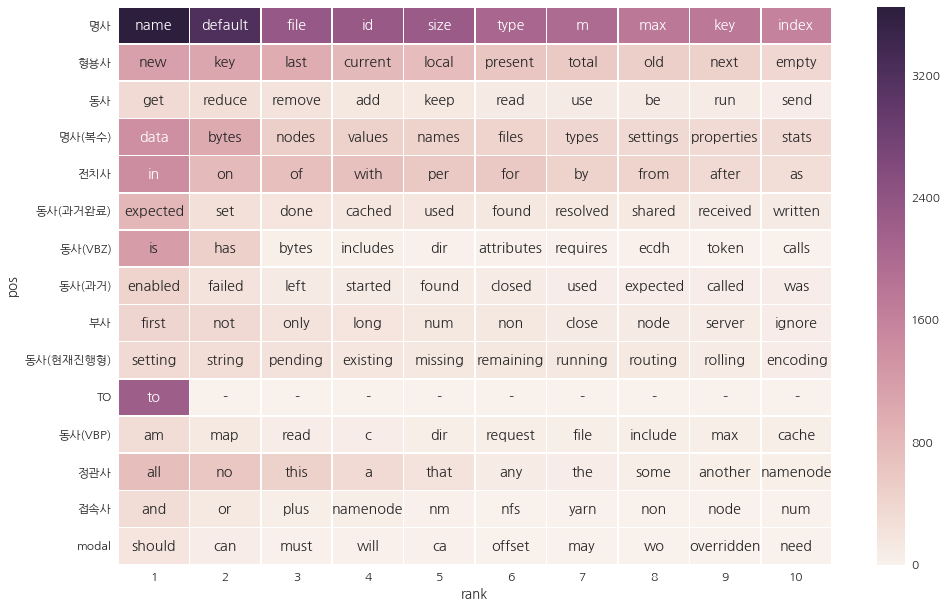

In [45]:
drawPopularPosWord(pos_token_ds[pos_token_ds['kind']=='variable'])

In [46]:
def partitialRank(ds, key, val='pos', topn=10):
    ds = ds.groupby([key,val]).agg({'tokens':len, }).reset_index()
    ds['rank'] = ds.groupby(key)['tokens'].rank("dense", ascending=False)
    ds = ds[(ds['rank']<=topn)].sort([key,'rank'])
    #ds['val'] = ds.apply(lambda x: "%s" %(x[val]), axis=1)
    kind_sum = ds.groupby('kind').sum().tokens
    ds['val'] = ds.apply(lambda x: "(%.0f%%)%s " %(x['tokens']*100/kind_sum[x['kind']], x[val]), axis=1)
    return ds[(ds['rank']<=10)].sort([key,'rank']).pivot_table(index=key, columns='rank', values='val', aggfunc=max)
    

In [47]:
def toKoreanPOSName(pos):
    return "+".join([ pos2name.get(w,'none') for w in pos.split('+')])
pos_tagged_ds['pos_kor'] = pos_tagged_ds.pos.apply( toKoreanPOSName )

In [48]:
partitialRank(pos_tagged_ds, 'kind', 'pos_kor', topn=10).T

kind,class,function,variable
rank,,,
1,(29%)명사+명사,(26%)명사+명사,(34%)명사+명사
2,(22%)명사+명사+명사,(16%)명사+명사+명사,(17%)명사
3,(14%)형용사+명사+명사,(9%)형용사+명사+명사,(12%)명사+명사+명사
4,(9%)명사+명사+명사+명사,(9%)명사,(10%)형용사+명사
5,(7%)형용사+명사,(8%)동사+명사+명사,(8%)명사+명사(복수)
6,(6%)명사,(8%)동사+형용사+명사,(7%)형용사+명사+명사
7,(6%)형용사+명사+명사+명사,(7%)형용사+명사,(3%)동사(과거완료)+명사
8,(4%)명사+명사(복수),(6%)명사+명사(복수),(3%)명사+명사+명사+명사
9,(2%)명사+명사+명사+명사+명사,(5%)동사(과거완료)+명사+명사,(3%)명사(복수)


In [49]:
partitialRank(pos_tagged_ds, 'len', 'pos_kor', 5)

KeyError: 'kind'

### 인기 사용 단어 

In [ ]:
def popularWord(ds, topn=10):
    kinds = ds.kind.unique()
    for kind in kinds:
        popular_words = ds[ds.kind==kind].groupby('lower').count().sort('word', ascending=False)[:topn]
        popular_words[['word']].plot(kind='bar', title=kind)
        plt.show()
    
popularWord(words_ds)

--- 
## 소스별 Topic 분석
* 토픽 추출 : TF-IDF 사용 
* Source를 Clustering : feature BOW를 TF-IDF값한 Vector를 사용 

In [ ]:
def toWordFrequency(ds):
    word_frq = ds.groupby('lower').count().reset_index()[['lower','topic']]
    word_frq = [frq.tolist() for frq in word_frq.values]
    return word_frq
word_frq = (words_ds[words_ds.kind=='function'])

네이밍 종류별(클래스, 함수, 변수) 단어 사용 빈도 

In [ ]:
for kind in "class function variable".split():
    word_frq = toWordFrequency(words_ds[words_ds.kind==kind])
    print("%s Word Cloud by Frequency" % kind )
    drawWordCloud(word_frq, figsize=(10,8))
    

소스별 단어 사용 빈도 



In [ ]:
for topic in words_ds.topic.unique():
    word_frq = toWordFrequency(words_ds[words_ds.topic==topic])
    print("%s Word Cloud by Frequency" % topic )
    drawWordCloud(word_frq, figsize=(8,8))
    

### TF-IDF로 Source별 Topic 뽑아 내기 


In [ ]:
import pandas as pd
grouped = words_ds.groupby('topic')
src_corpus = []
idx2topic = []              
for (topic, ds) in grouped:
    src_corpus.append(ds.lower.values.tolist())
    idx2topic.append(topic)

In [ ]:
from gensim import corpora, models, similarities
from time import time
dictionary = corpora.Dictionary(src_corpus)

# compile corpus (vectors number of times each elements appears)
raw_corpus = [dictionary.doc2bow(t) for t in src_corpus]

# Transform Text with TF-IDF
tfidf = models.TfidfModel(raw_corpus) # step 1 -- initialize a model

In [ ]:
import operator

for (idx, src_name) in enumerate(idx2topic):
    topic = tfidf[raw_corpus[idx]]
    src_name = src_name.lower()
    topic = [ (dictionary[word], score) for (word,score) in topic ]
    # topic = [ (dictionary[word], score) for (word,score) in topic if src_name != dictionary[word] ]
    #topic.append(("[%s]" % src_name, 1))
    topic = sorted(topic, key=operator.itemgetter(1), reverse=True)
        
    print( src_name )
    drawWordCloud(topic[:200])


In [ ]:
vec_dim_n = len(dictionary.id2token) + 1
topic_vec = []
for (idx, src_name) in enumerate(idx2topic):
    topic = tfidf[raw_corpus[idx]]
    #topic = raw_corpus[idx]
    src_name = src_name.lower()
    vec = [0] * vec_dim_n

    for (idx,score) in topic:
        vec[idx] = score
    topic_vec.append(vec)

In [ ]:
from scipy.spatial import distance 
import scipy
def cos_cdist(matrix, vector):
    """
    Compute the cosine distances between each row of matrix and vector.
    """
    v = vector.reshape(1, -1)
    return scipy.spatial.distance.cdist(matrix, v, 'cosine').reshape(-1)


def matrix_similarity( matrix_ds, dist='euclidean'):
    
    sim_mat = []
    name = []
    for idx, row in matrix_ds.iterrows():
        name.append(idx)
        sim_mat.append(cos_cdist( matrix_ds, row ).tolist())
    ds = 1-pd.DataFrame(sim_mat, columns=name, index=name)
    return ds

In [ ]:
topic_vec_ds = pd.DataFrame(topic_vec, index=idx2topic)

In [ ]:
#place_ds = pd.pivot_table( sw_ds, index='top_place', columns='actor', values='type', aggfunc=len, fill_value=0)
ds = matrix_similarity(topic_vec_ds)

In [ ]:
ds.applymap(lambda x: min(4.,x*10))


In [ ]:
cmap = sns.cubehelix_palette(as_cmap=True, rot=-.3, light=1.)
ax = sns.clustermap(ds.applymap(lambda x: min(.4, x)), linewidths=.5 )
ax = sns.clustermap(ds, cmap=cmap, linewidths=.5 )